<a href="https://colab.research.google.com/github/Welle-Kim/Based-on-the-Review/blob/master/2_%EB%B2%85%EC%8A%A4%EB%AE%A4%EC%A7%81_%ED%81%AC%EB%A1%A4%EB%A7%81_%EB%B0%8F_%EB%B6%84%EC%84%9D_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 벅스뮤직 일간 차트 자료 크롤링
- 일자별 차트 크롤링
- 시작일부터 종료일까지 차트 내용 가져오기
- 기간내에 가장 많이 등장한 아티스트, 곡 확인 및 시각화
- 곡에 대한 순위 변동 확인 및 시각화

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

#### 1등만 가져오기

In [2]:
url = "https://music.bugs.co.kr/chart/track/day/total?chartdate=" 
url = url + str(20220323)

html = requests.get(url)
soup = bs(html.text, "html.parser")

bugs_day=[]
tbody=soup.find("tbody")
tr_soup=tbody.find_all("tr")

rank=tr_soup[0].find("div", class_="ranking").get_text().split("\n")[1]
title=tr_soup[0].find("p", class_="title").get_text().replace("\n", "")
art=tr_soup[0].find("p", class_="artist").get_text().replace("\n", "")
album=tr_soup[0].find("a", class_="album").get_text().replace("\n", "")
bugs_day.append([rank, title, art, album])
bugs_day

[['1', 'TOMBOY', '(여자)아이들', 'I NEVER DIE']]

#### 전체 순위 가져오기

In [3]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

url = "https://music.bugs.co.kr/chart/track/day/total?chartdate=" 
url = url + str(20220323)

html = requests.get(url)
soup = bs(html.text, "html.parser")

bugs_day=[]
tbody=soup.find("tbody")
tr_soup=tbody.find_all("tr")

for tr in tr_soup:
    rank=tr.find("div", class_="ranking").get_text().split("\n")[1]
    title=tr.find("p", class_="title").get_text().replace("\n", "")
    art=tr.find("p", class_="artist").get_text().replace("\n", "")
    album=tr.find("a", class_="album").get_text().replace("\n", "")
    bugs_day.append([rank, title, art, album])
    
# bugs_day
df=pd.DataFrame(bugs_day, columns=["순위", "곡명", "아티스트", "앨범"])
df

,순위,곡명,아티스트,앨범
0,1,TOMBOY,(여자)아이들,I NEVER DIE
1,2,Feel My Rhythm,Red Velvet (레드벨벳),‘The ReVe Festival 2022 - Feel My Rhythm’
2,3,GANADARA (Feat. 아이유),박재범,GANADARA
3,4,사랑인가 봐,멜로망스(MeloMance),사랑인가 봐 (사내맞선 OST 스페셜 트랙)
4,5,INVU,태연 (TAEYEON),INVU - The 3rd Album
...,...,...,...,...
95,96,Diamonds (feat. 태용 of NCT),SURAN (수란),FLYIN' PART1
96,97,WA DA DA,Kep1er (케플러),FIRST IMPACT
97,98,Stardust love song,지효 (TWICE),스물다섯 스물하나 OST Part 6
98,99,소주 한 잔,양다일,소주 한 잔


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      100 non-null    object
 1   곡명      100 non-null    object
 2   아티스트    100 non-null    object
 3   앨범      100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB


#### 순위에 따른 점수
- 1등 => 100점, 100등 => 1점

In [5]:
score=[]
for i in range(100):
    score.append(101-int(df.loc[i, "순위"]))
df["점수"]=score
df

,순위,곡명,아티스트,앨범,점수
0,1,TOMBOY,(여자)아이들,I NEVER DIE,100
1,2,Feel My Rhythm,Red Velvet (레드벨벳),‘The ReVe Festival 2022 - Feel My Rhythm’,99
2,3,GANADARA (Feat. 아이유),박재범,GANADARA,98
3,4,사랑인가 봐,멜로망스(MeloMance),사랑인가 봐 (사내맞선 OST 스페셜 트랙),97
4,5,INVU,태연 (TAEYEON),INVU - The 3rd Album,96
...,...,...,...,...,...
95,96,Diamonds (feat. 태용 of NCT),SURAN (수란),FLYIN' PART1,5
96,97,WA DA DA,Kep1er (케플러),FIRST IMPACT,4
97,98,Stardust love song,지효 (TWICE),스물다섯 스물하나 OST Part 6,3
98,99,소주 한 잔,양다일,소주 한 잔,2


In [6]:
# for 한줄쓰기
df["점수"]=[101-int(df.loc[i, "순위"]) for i in range(100)]
df.head()

,순위,곡명,아티스트,앨범,점수
0,1,TOMBOY,(여자)아이들,I NEVER DIE,100
1,2,Feel My Rhythm,Red Velvet (레드벨벳),‘The ReVe Festival 2022 - Feel My Rhythm’,99
2,3,GANADARA (Feat. 아이유),박재범,GANADARA,98
3,4,사랑인가 봐,멜로망스(MeloMance),사랑인가 봐 (사내맞선 OST 스페셜 트랙),97
4,5,INVU,태연 (TAEYEON),INVU - The 3rd Album,96


In [7]:
score_2=sorted(list(range(1, 101)),reverse=True)
print(score_2)

[100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


#### [미션] 특정 기간에 순위 클로링
- 시작일/종료일 => 사용자로부터 입력받아 진행
- 기간 전체 순위 가져오기(2022-02-01 ~ 2022-03-23)
- 가져온 데이터는 DataFrame으로 출력하기

In [8]:
#!pip install tqdm

In [9]:
# 시작일부터 종료일까지 날짜 생성하기
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from tqdm import tqdm

sdt=input("시작일 입력:")
edt=input("종료일 입력:")

dates=pd.date_range(sdt, edt)
dates=[i.strftime("%Y%m%d") for i in dates]
#print(dates)

df_bugs=pd.DataFrame()

for date in tqdm(dates):
    url="https://music.bugs.co.kr/chart/track/day/total?chartdate=" + str(date)
    
    html=requests.get(url)
    soup = bs(html.text, "html.parser")
    
    bugs_day=[]
    tbody=soup.find("tbody")
    tr_soup=tbody.find_all("tr")
    
    scr=101   # 점수 초기값
    for tr in tr_soup:
        rank=tr.find("div", class_="ranking").get_text().split("\n")[1]
        title=tr.find("p", class_="title").get_text().replace("\n", "")
        art=tr.find("p", class_="artist").get_text().replace("\n", "")
        album=tr.find("a", class_="album").get_text().replace("\n", "")
        scr -= 1  # 1회 추출시 -1 만큼 감소
        bugs_day.append([date, rank, title, art, album, scr])

    # bugs_day
    df=pd.DataFrame(bugs_day, columns=["날짜", "순위","곡명","아티스트",
                                       "앨범","점수"])
    df_bugs=pd.concat([df_bugs, df])
    
df_bugs.reset_index(drop=True, inplace=True) 
#df_bugs=df_bugs.reset_index(drop=True)
df_bugs.info()

시작일 입력:2022-04-04
종료일 입력:2022-5-05


100%|██████████| 32/32 [00:46<00:00,  1.45s/it]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      3200 non-null   object
 1   순위      3200 non-null   object
 2   곡명      3200 non-null   object
 3   아티스트    3200 non-null   object
 4   앨범      3200 non-null   object
 5   점수      3200 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 150.1+ KB


#### 특정 곡 조회후 꺾은선 차트로 출력

In [10]:
df_bugs.head()

,날짜,순위,곡명,아티스트,앨범,점수
0,20220404,1,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),봄여름가을겨울 (Still Life),100
1,20220404,2,TOMBOY,(여자)아이들,I NEVER DIE,99
2,20220404,3,Feel My Rhythm,Red Velvet (레드벨벳),‘The ReVe Festival 2022 - Feel My Rhythm’,98
3,20220404,4,GANADARA (Feat. 아이유),박재범,GANADARA,97
4,20220404,5,사랑인가 봐,멜로망스(MeloMance),사랑인가 봐 (사내맞선 OST 스페셜 트랙),96


In [11]:
df_bugs[df_bugs['순위']=="1"].tail()

,날짜,순위,곡명,아티스트,앨범,점수
2700,20220501,1,That That (prod. & feat. SUGA of BTS),싸이 (PSY),싸다9,100
2800,20220502,1,That That (prod. & feat. SUGA of BTS),싸이 (PSY),싸다9,100
2900,20220503,1,That That (prod. & feat. SUGA of BTS),싸이 (PSY),싸다9,100
3000,20220504,1,That That (prod. & feat. SUGA of BTS),싸이 (PSY),싸다9,100
3100,20220505,1,That That (prod. & feat. SUGA of BTS),싸이 (PSY),싸다9,100


In [12]:
df_at=df_bugs.groupby("아티스트")[["곡명"]].count()
dfat_10=df_at.sort_values("곡명", ascending=False).head(10)
dfat_10=dfat_10.reset_index()
dfat_10

,아티스트,곡명
0,아이유(IU),175
1,BE'O (비오),117
2,임영웅,103
3,BIGBANG (빅뱅),100
4,방탄소년단,97
5,태연 (TAEYEON),96
6,aespa,96
7,싸이 (PSY),81
8,(여자)아이들,76
9,IVE (아이브),71


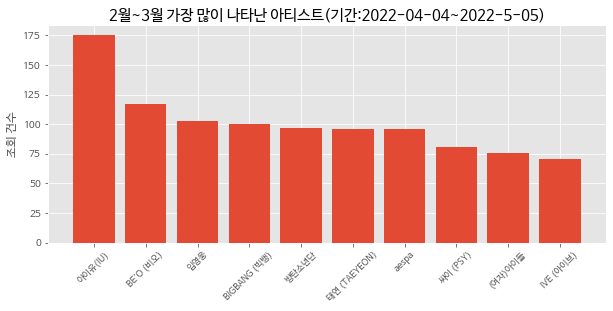

In [25]:
import matplotlib.pyplot as plt
import platform

# if platform.system() == "Darwin":  # 맥
#     plt.rc('font', family = "AppleGothic")
# elif platform.system() == "Windows":  # 윈도우
#     plt.rc('font', family = "Malgun Gothic")
# elif platform.system() == "Linux":  # 리눅스 => 코랩
#     plt.rc('font', family = "Nanum Gothic")

plt.style.use('ggplot')
plt.figure(figsize=(10, 4))
plt.xticks(size=9, rotation=45)
plt.bar(dfat_10['아티스트'], dfat_10['곡명'])
plt.title(f"2월~3월 가장 많이 나타난 아티스트(기간:{sdt}~{edt})", size=15)
plt.ylabel("조회 건수")
plt.rc('font', family='NanumBarunGothic') 
plt.show()

#### 가장 많이 나타난 아티스트(태연)의 노래 조회 건수

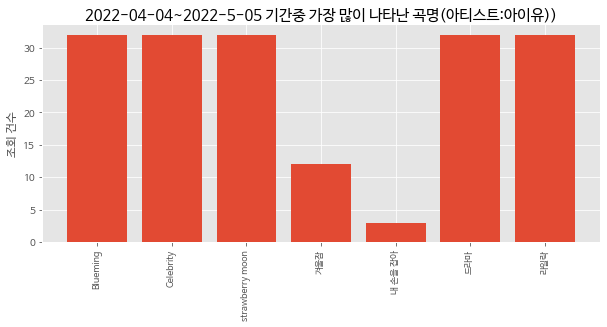

In [26]:
import matplotlib.pyplot as plt
df_tae=df_bugs[df_bugs['아티스트']=="아이유(IU)"]
df_tit=df_tae.groupby("곡명")[["아티스트"]].count()

plt.style.use('ggplot')
plt.figure(figsize=(10, 4))
plt.xticks(size=9, rotation=90)

plt.bar(df_tit.index, df_tit.아티스트)

plt.title(f"{sdt}~{edt} 기간중 가장 많이 나타난 곡명(아티스트:아이유))", size=15)
plt.ylabel("조회 건수")
plt.rc('font', family='NanumBarunGothic') 
plt.show()

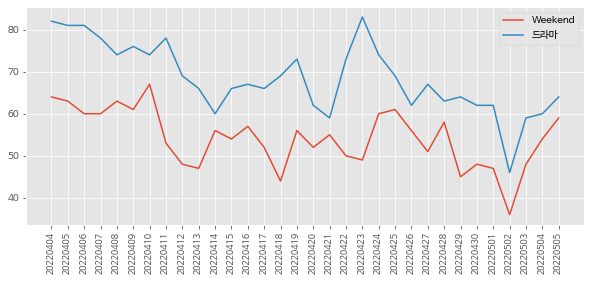

In [28]:
import matplotlib.pyplot as plt

df_weekend=df_bugs[df_bugs['곡명']=="Weekend"]
df_tombouy=df_bugs[df_bugs['곡명']=="드라마"]

plt.style.use('ggplot')

plt.figure(figsize=(10, 4))
plt.xticks(size=9, rotation=90)

plt.plot(df_weekend.날짜, df_weekend.점수, label="Weekend")
plt.plot(df_tombouy.날짜, df_tombouy.점수, label="드라마")

plt.rc('font', family='NanumBarunGothic') 
plt.legend()
plt.show()

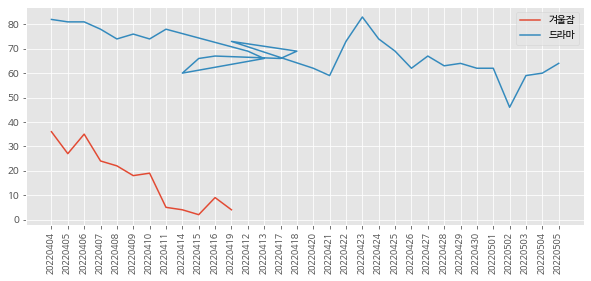

In [29]:
import matplotlib.pyplot as plt

df_weekend=df_bugs[df_bugs['곡명']=="겨울잠"]
df_tombouy=df_bugs[df_bugs['곡명']=="드라마"]

plt.style.use('ggplot')

plt.figure(figsize=(10, 4))
plt.xticks(size=9, rotation=90)

plt.plot(df_weekend.날짜, df_weekend.점수, label="겨울잠")
plt.plot(df_tombouy.날짜, df_tombouy.점수, label="드라마")

plt.rc('font', family='NanumBarunGothic') 
plt.legend()
plt.show()

In [18]:
df_tae["곡명"].unique()  # 고유값 찾기

array(['드라마', 'strawberry moon', '라일락', 'Celebrity', '겨울잠', 'Blueming',
       '내 손을 잡아'], dtype=object)

### [미션] 1. 아티스트(아이유)의 곡들에 대한 일자별 순위 번화 차트
- 곡 하나당 차트 하나
- 차트 하나에 모든 곡 표현

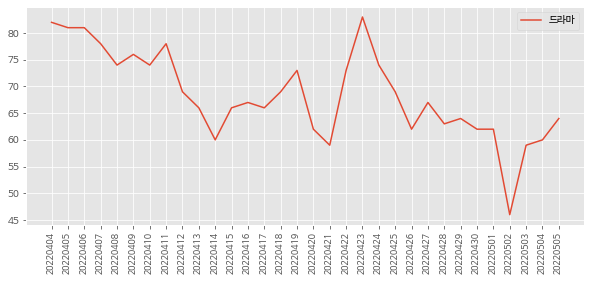

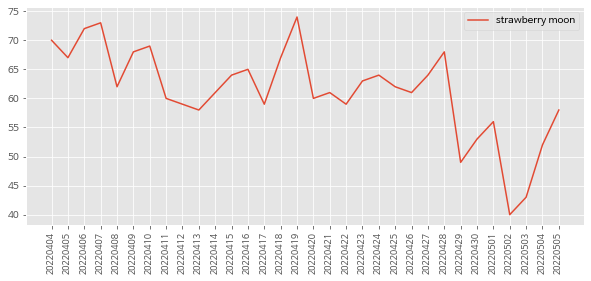

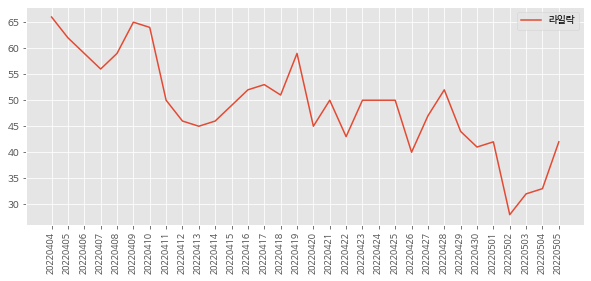

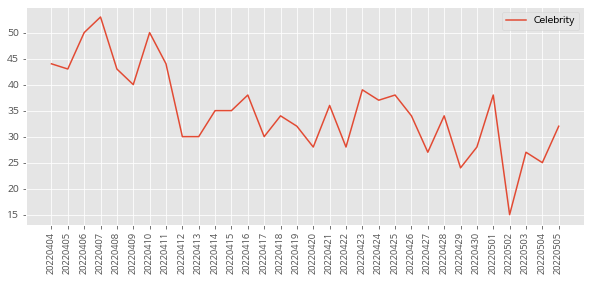

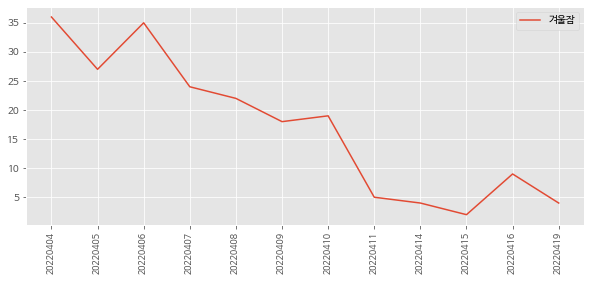

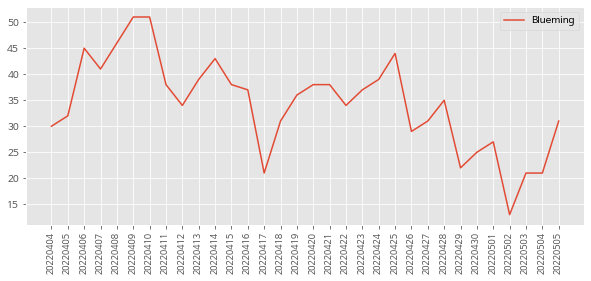

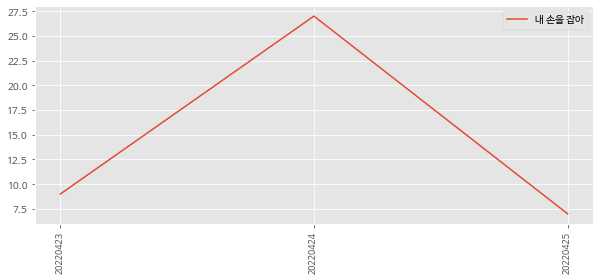

In [30]:
for tit in df_tae["곡명"].unique():
    df_title=df_bugs[df_bugs['곡명']==tit]

    plt.style.use('ggplot')

    plt.figure(figsize=(10, 4))
    plt.xticks(size=9, rotation=90)

    plt.plot(df_title.날짜, df_title.점수, label=tit)

    plt.legend()
    plt.show()

### [미션] 2. 아티스트와 곡명을 입력받아 순위 변화 그래프 출력  

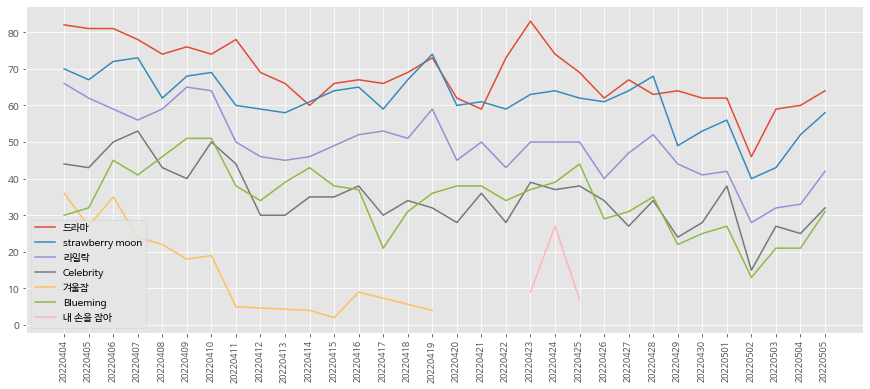

In [31]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(15, 6))
plt.xticks(size=9, rotation=90)

for tit in df_tae["곡명"].unique():
    df_title=df_bugs[df_bugs['곡명']==tit]
    plt.plot(df_title.날짜, df_title.점수, label=tit)

plt.rc('font', family='NanumBarunGothic') 
plt.legend()
plt.show()

In [32]:
df_bugs.to_csv("./bugo_")